<div style="text-align: center"> Université de La Réunion - ENERGY Lab - Master Énergie - M2

              
<div style="text-align: center"> S5PH322 | 1 | Diagnostic des systèmes - EXAMEN


<div style="text-align: center"> N° d'étudiant-e : ..................................... Prénom NOM : ......................................................................................

# EXAMEN. Diagnostic

Cette session a pour but de mettre oeuvre les compétences acquises au cours du module S5PH322.
 

**Objectifs :**
- réduire le nombre de caractéristique utilisés pour la classification en utilisant deux approches différentes (ACP et UMAP:Uniform manifold approximation and projection for dimension reduction)
- identifier deux classifieurs supervisés à partir des composantes retenues
- évaluer la performance des classifieurs et l'impact de l'approche de reduction de dimension sur les résultats

Tous les développements seront effectués sur la base de données digits qui contient des images de chiffres manuscrit (de 0 à 9).

## 1. Téléchargement et visualiation des données

**A COMPLETER**.

### Structure de la base de données digits
La base de données digits fait partie des ensembles de données d'exemple fournis par scikit-learn. Elle contient des images de chiffres manuscrits (de 0 à 9) numérisées. La base de données contients 1797 échantillons. Les images originales (8x8 pixels) sont stockées sous forme aplatie dans X

#### Entrées (X)

- Type : Images en niveaux de gris de chiffres manuscrits - Dimension : (1797, 64)

1797 échantillons
Chaque image est aplatie en un vecteur de 64 caractéristiques (8x8 pixels)


- Valeurs : Entiers de 0 à 16 (intensité des pixels)


#### Sorties (y) :

- Type : Étiquettes des chiffres correspondants Dimension : (1797,)

1797 étiquettes, une pour chaque image

- Valeurs : Entiers de 0 à 9 (les chiffres représentés)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


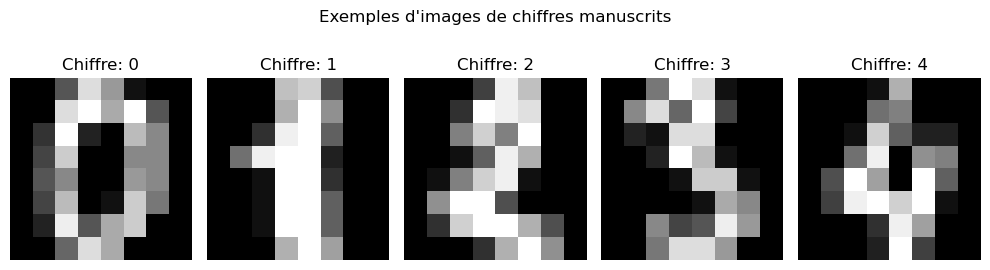

Forme d'une image: (8, 8)

Valeurs des pixels pour la première image:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Shape of X (data): (1797, 64)
Shape of y (target): (1797,)

Unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

# Charger les données
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Sélectionner quelques exemples à afficher
n_samples = 5
fig, axes = plt.subplots(1, n_samples, figsize=(10, 3))
fig.suptitle("Exemples d'images de chiffres manuscrits")

for i in range(n_samples):
    ax = axes[i]
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Chiffre: {digits.target[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Afficher les détails d'une image
print("Forme d'une image:", digits.images[0].shape,end="\n\n")

print("Valeurs des pixels pour la première image:")
print(digits.images[0])

# Examiner la structure
print()
print("Shape of X (data):", digits.data.shape)
print("Shape of y (target):", digits.target.shape)
print()

# Afficher les valeurs uniques des étiquettes
print("Unique labels:", set(digits.target))

## 2 Préparation des données apprentissage et validation


80% des données sont utilisées pour la phase d'apprentissage et 20% pour la validation.

In [2]:
from sklearn.model_selection import train_test_split
seed = 7 #On fixe la seed afin de pouvoir comparer les résultats plus rigoureusement
test_size = 0.20
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,shuffle=False)
print('ndimension X_train : ', X_train.shape)
print('ndimension y_train : ', y_train.shape)
print("Unique labels:", set(y_train))

ndimension X_train :  (1437, 64)
ndimension y_train :  (1437,)
Unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


## 3. Application de l'ACP pour réduire le nombre de caractéristique
L’analyse en composantes principales permet de réduire la dimension du nombre de caractéristique utilisées pour la classification (effectuée sur un nombre réduit de composantes principales). Le nombre de composantes principales utilisées comme caractéristiques dépend du pourcentage de la variance totale expliquée par chaque composante principale.

### 3.1 ACP des données d'entrées

##### (a) Effectuer une ACP des données d'entrées d'apprentissage X_train et  appliquer cette ACP aux  données d'entrées X_test.

On notera X_train_ACP et X_test_ACP les entrées obtenues après l'ACP.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# ACP
model_ACP = PCA()
X_pca_train = model_ACP.fit_transform(X_train)
X_pca_test = model_ACP.transform(X_test)


##### (b) Visualiser les 2 premières composantes

/var/folders/wr/vt_lqhg10qdf7vs0ltrz7z9r0000gp/T/ipykernel_30031/674215977.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=y_train, cmap=plt.cm.get_cmap('jet', 10))


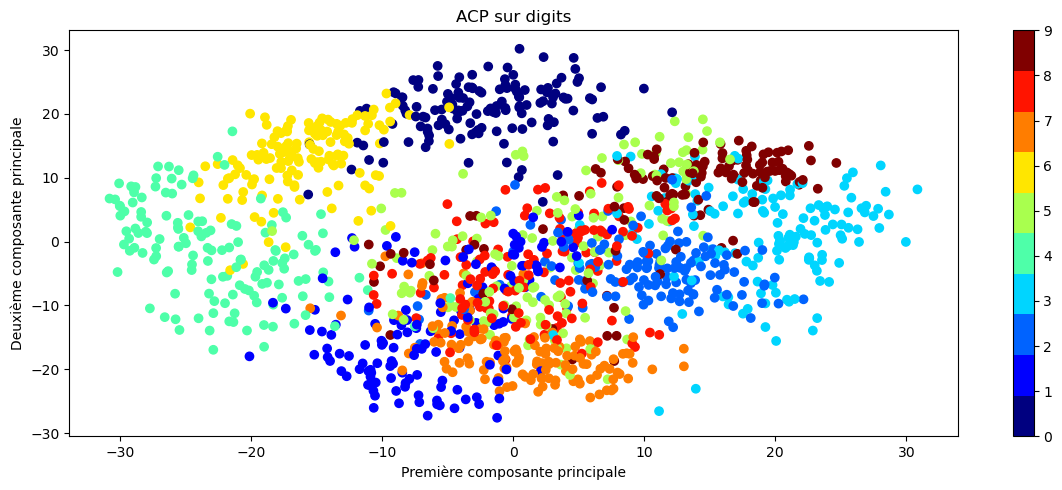

In [4]:
# Visualisation des 2 premières composantes
plt.figure(figsize=(12, 5))

plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=y_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.title('ACP sur digits')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')

plt.tight_layout()
plt.show()

### 3.2 Visualisation du pourcentage de variance expliqué par chaque composante

##### (a) Calculer et visualiser le pourcentage de variance expliquée par chaque composante.

Text(0.5, 1.0, 'Variance expliquée')

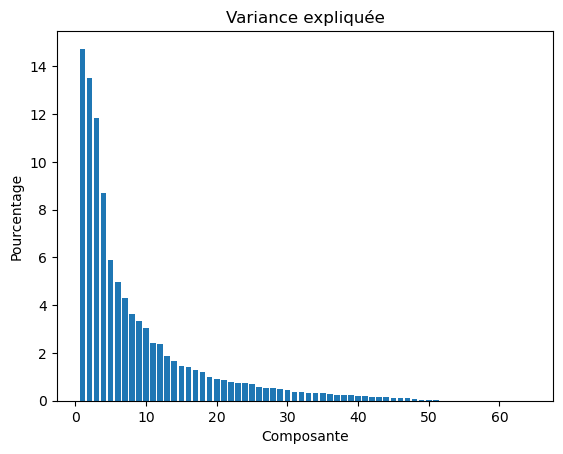

In [5]:
#------------- Calcul du pourcentage de variance expliquée par chaque composante-----------------
variance=model_ACP.explained_variance_ratio_
variance=variance*100

#------------- Visualisation graphique de la variance expliquée par chaque composante-----------------
plt.figure()
plt.bar(range(1,len(variance)+1),variance)  # tracer du graphe
plt.xlabel('Composante')  # titre sur l'axe des abcisses
plt.ylabel('Pourcentage')  # titre sur l'axe des ordonnés
plt.title('Variance expliquée')  # ajout d'un titre


##### (b) Calculer et visualiser le pourcentage de la variance expliquée cumulée.


Pourcentage de variance cumulée est : [ 14.74  28.23  40.05  48.74  54.63  59.58  63.87  67.5   70.83  73.89
  76.31  78.68  80.55  82.23  83.69  85.09  86.38  87.59  88.57  89.48
  90.37  91.17  91.93  92.66  93.35  93.94  94.48  94.99  95.48  95.92
  96.29  96.64  96.98  97.31  97.62  97.89  98.14  98.37  98.59  98.81
  98.99  99.16  99.31  99.45  99.57  99.68  99.78  99.86  99.91  99.95
  99.97  99.98  99.99  99.99 100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.  ] %


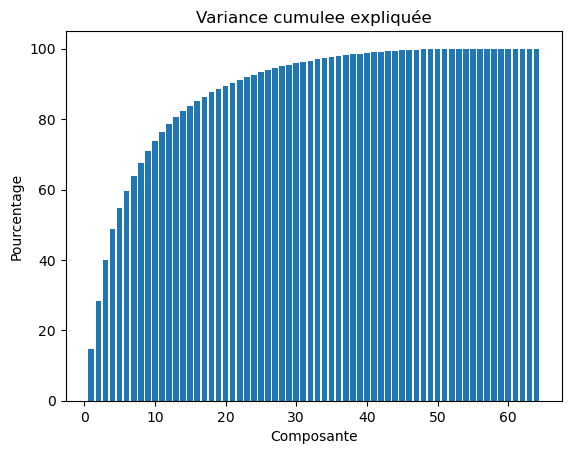

In [6]:

#------------- Calcul de la variance expliquée cumulée-----------------
variance_cumulee = np.cumsum(variance)


#------------- Visualisation graphique de la variance expliquée cumulée -----------------
plt.figure()
plt.bar(range(1,len(variance_cumulee)+1),variance_cumulee) # tracer du graphe
plt.xlabel('Composante')  # titre sur l'axe des abcisses
plt.ylabel('Pourcentage')  # titre sur l'axe des ordonnés
plt.title('Variance cumulee expliquée')  # ajout d'un titre

#------------- Afficher le pourcentage de variance expliquée cumulée (garder 2 chiffres après la virgule)
print('\nPourcentage de variance cumulée est :', variance_cumulee.round(2),'%')

### 3.3 Réduction du nombre de caractéristiques utililisées pour la classification

A partir des résultats précendents, conserver uniquement les composantes nécessaire afin de préserver plus 80% de l'information. On notera X_train_reduit et X_test_reduit les résultats obtenus.

In [7]:
nbr_composante_conserve=13 #Avec 13 composante - 80% de l'information

#------------- Calcul X_train_reduit-----------------
X_train_reduit=X_pca_train[:,0:nbr_composante_conserve]


#------------- Calcul X_test_reduit -----------------
X_test_reduit=X_pca_test[:,0:nbr_composante_conserve]


#------------- Afficher les dimensions de X_train, X_train_reduit, X_test et X_test_reduit
print('\ndimension X_train', X_train.shape)
print('dimension X_train_reduit', X_train_reduit.shape)

print('\ndimension X_test', X_test.shape)
print('dimension X_test_reduit', X_test_reduit.shape)


dimension X_train (1437, 64)
dimension X_train_reduit (1437, 13)

dimension X_test (360, 64)
dimension X_test_reduit (360, 13)


### 3.4  Identification d'un modèle classifieur en utilisant  un nombre réduit de caractéristiques
#### 3.4.1 KNN
Identifier un modèle KNN à 3 voisins à partir des données d'entrées-sortie d'apprentissage X_train_reduit et y_train.

In [31]:
# A compléter

# Bibliothèque(s) requise(s)
import sklearn
from sklearn.neighbors import KNeighborsClassifier  # bibliotheque machine learning sklearn, methode KNN
from sklearn.metrics import accuracy_score  # bibliotheque pour calculer la precision du modele


#------------- Génération d'un modèle classifieur --------------
n_neighbors = 3;
model_classifieur = KNeighborsClassifier(n_neighbors)

#--------- Identification du modèle classifieur généré ---------
# entrainement du modele
model_classifieur.fit(X_train_reduit, y_train)


KNeighborsClassifier(n_neighbors=3)

#### 3.4.1.1 Analyse des performances du modèle classifieur (en apprentissage et en validation)
Aanalyser en détail les résultats obtenus en apprentissage et en validation.
Utiliser les **matrices de confusion.**

**Commenter les résultats obtenus**.

In [32]:
# Matrices de confusion sur les données d'apprentissage 
from sklearn.metrics import ConfusionMatrixDisplay


#titles = "Matrice de confusion sur les données d'apprentissage"  # choix de matrice de confusion (normalise ou pas)
#disp = ConfusionMatrixDisplay.from_estimator(model_classifieur, X_train_reduit, y_train, cmap=plt.cm.Reds, normalize=None)  

#disp.ax_.set_title(titles)

#titles = "Matrice de confusion sur les données d'apprentissage (normalisée)"  # choix de matrice de confusion (normalise ou pas)
#disp = ConfusionMatrixDisplay.from_estimator(model_classifieur, X_train_reduit, y_train,cmap=plt.cm.Blues, normalize='true')  
#disp.ax_.set_title(titles)



Accuracy on train data: 0.992 KNN 
Accuracy on test data: 0.947 KNN


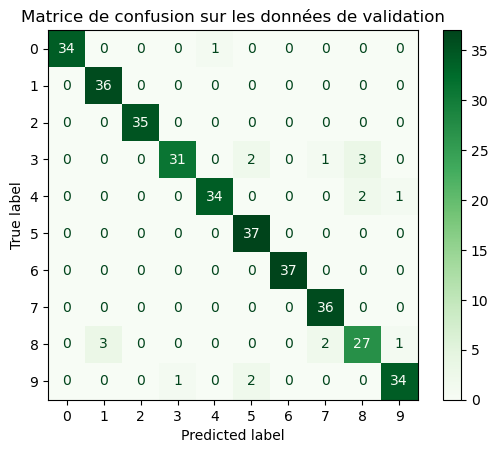

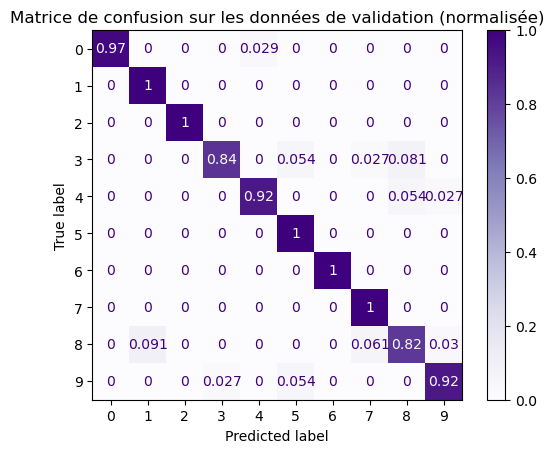

In [33]:
# Matrices de confusion sur les données de validation

titles_options = "Matrice de confusion sur les données de validation"  # choix de matrice de confusion (normalise ou pas)
disp = ConfusionMatrixDisplay.from_estimator(model_classifieur, X_test_reduit, y_test, cmap=plt.cm.Greens, normalize=None)  
disp.ax_.set_title(titles_options)  # positionnement du titre

titles_options = "Matrice de confusion sur les données de validation (normalisée)"  # choix de matrice de confusion (normalise ou pas)
disp = ConfusionMatrixDisplay.from_estimator(model_classifieur, X_test_reduit, y_test, cmap=plt.cm.Purples, normalize='true')  
disp.ax_.set_title(titles_options)  # positionnement du titre

# performances
score_Test = model_classifieur.score(X_test_reduit,y_test)
score_Train = model_classifieur.score(X_train_reduit, y_train)

print('\nAccuracy on train data: {} KNN \nAccuracy on test data: {} KNN'.format(score_Train.round(3),score_Test.round(3)))
plt.show()


#### 3.4.2 Forêt aléatoire
Identifier un modèle forêt aléatoire avec 50 arbres à partir des données d'entrées-sortie d'apprentissage X_train_reduit et y_train.

In [34]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=50,random_state=42)
model_RF.fit(X_train_reduit, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

#### 3.4.2.1 Analyse des performances du modèle classifieur (en apprentissage et en validation)
Aanalyser en détail les résultats obtenus en apprentissage et en validation.
Utiliser les **matrices de confusion.**

**Commenter les résultats obtenus**.


Accuracy on train data: 1.0 FORET ALEATOIRE 
Accuracy on test data: 0.917 FORET ALEATOIRE


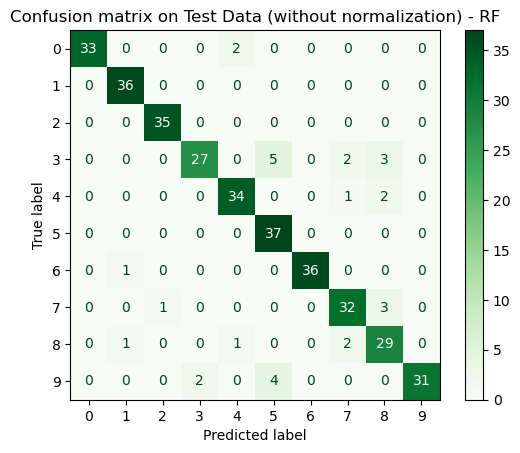

In [35]:
#y_pred = clf.predict(X_test)
score_Test = model_RF.score(X_test_reduit,y_test)
score_Train = model_RF.score(X_train_reduit, y_train)

disp = ConfusionMatrixDisplay.from_estimator(model_RF, X_test_reduit, y_test, cmap=plt.cm.Greens)  
disp.ax_.set_title("Confusion matrix on Test Data (without normalization) - RF")  # positionnement du titre

print('\nAccuracy on train data: {} FORET ALEATOIRE \nAccuracy on test data: {} FORET ALEATOIRE'.format(score_Train.round(3),score_Test.round(3)))
plt.show()

## 3BIS. Application de kernel ACP pour réduire le nombre de caractéristique

### 3.1BIS KACP des données d'entrées

kACP des données d'entrées

Déterminer la bibliothèque, les instructions et les structures requises :
- pour effectuer une kACP des données d'entrées d'apprentissage X_train,
- et pour appliquer cette kACP aux  données d'entrées X_test.

On notera X_train_kACP et X_test_kACP les entrées obtenues après l'kACP. **On utilisera un kernel cosine.**

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/wr/vt_lqhg10qdf7vs0ltrz7z9r0000gp/T/ipykernel_22910/3160553883.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_kpca_train[:, 0], X_kpca_train[:, 1], c=y_train, cmap=plt.cm.get_cmap('jet', 10))


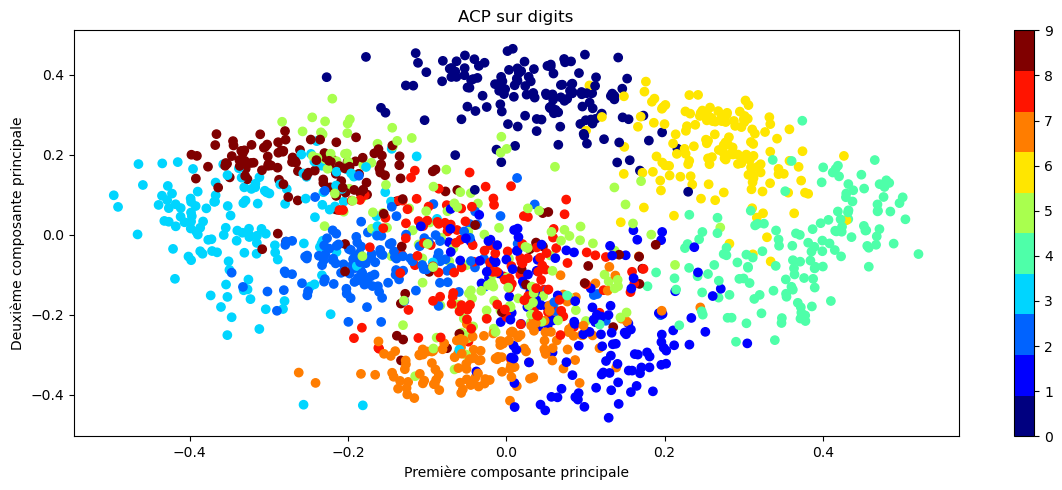

In [36]:
from sklearn.decomposition import KernelPCA


# kACP
kernel_pca = KernelPCA(n_components=13,kernel="cosine")#On conserve 13 composante comme pour ACP
X_kpca_train = kernel_pca.fit_transform(X_train)
X_kpca_test = kernel_pca.transform(X_test)



# Visualisation des 2 premières composantes
plt.figure(figsize=(12, 5))

plt.scatter(X_kpca_train[:, 0], X_kpca_train[:, 1], c=y_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.title('ACP sur digits')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')

plt.tight_layout()
plt.show()


Accuracy on train data: 0.992 KNN + KPCA 
Accuracy on test data: 0.956 KNN + KPCA


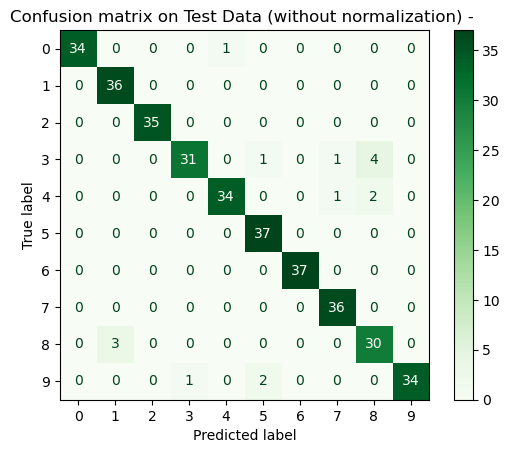

In [37]:
#------------- Génération d'un modèle classifieur --------------
n_neighbors = 3;
model_classifieur_KNN = KNeighborsClassifier(n_neighbors)
#model_classifieur_KNN = SVC()

#--------- Identification du modèle classifieur généré ---------
# entrainement du modele
model_classifieur_KNN.fit(X_kpca_train, y_train)

#y_pred = clf.predict(X_test)
score_Test = model_classifieur_KNN.score(X_kpca_test,y_test)
score_Train = model_classifieur_KNN.score(X_kpca_train, y_train)

disp = ConfusionMatrixDisplay.from_estimator(model_classifieur_KNN, X_kpca_test, y_test, cmap=plt.cm.Greens)  
disp.ax_.set_title("Confusion matrix on Test Data (without normalization) - ")  # positionnement du titre

print('\nAccuracy on train data: {} KNN + KPCA \nAccuracy on test data: {} KNN + KPCA'.format(score_Train.round(3),score_Test.round(3)))
plt.show()

Remarque : On fait un peu mieux qu'avec ACP mais on a toujours 13 composantes

## 4. Application de UMAP (Uniform manifold approximation and projection for dimension reduction) pour réduire le nombre de caractéristique

### 4.1 UMAP des données d'entrées

Déterminer la bibliothèque, les instructions et les structures requises :
- pour effectuer UMAP des données d'entrées d'apprentissage X_train pour réduire le nombre de caractéristiques à 2,
- et pour appliquer UMAP aux  données d'entrées X_test.

On notera X_train_umap et X_test_umap les entrées obtenues après UMAP.

In [38]:
# AVEC t-nse
#from sklearn.manifold import TSNE
#tsne = TSNE(n_components=2, random_state=42)
##On ne pas faire : #X_tsne_test = tsne.transform(X_test) .transform n'existe PAS !!!

#X_tsne = tsne.fit_transform(X)

#X_tsne_train, X_tsne_test, y_train, y_test = train_test_split(X_tsne, y, test_size=test_size,shuffle=False)

#plt.scatter(X_tsne_train[:, 0], X_tsne_train[:, 1], c=y_train, cmap=plt.cm.get_cmap('jet', 10))
#plt.colorbar(ticks=range(10))
#plt.title('tnse sur digits')
#plt.xlabel('Première dimension')
#plt.ylabel('Deuxième dimension')

In [8]:


# UMAP alternative plus récente à t-sne
#INSTALLATION 
# Dans un terminal : pip install umap-learn

from umap import UMAP

umap = UMAP(n_components=2, random_state=42)
X_umap_train = umap.fit_transform(X_train)
X_umap_test = umap.transform(X_test)



2024-11-14 10:51:38.846410: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/cdamour/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


##### (b) Visualiser les 2 premières composantes

/var/folders/wr/vt_lqhg10qdf7vs0ltrz7z9r0000gp/T/ipykernel_22910/2407068133.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_umap_train[:, 0], X_umap_train[:, 1], c=y_train, cmap=plt.cm.get_cmap('jet', 10))


Text(0, 0.5, 'Deuxième dimension')

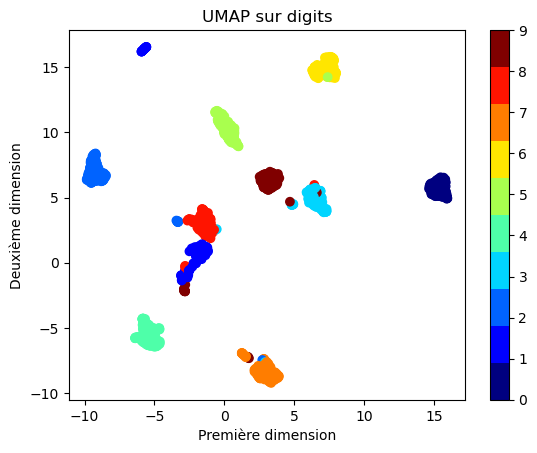

In [40]:
# visulation des 2 premières composantes
plt.scatter(X_umap_train[:, 0], X_umap_train[:, 1], c=y_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.title('UMAP sur digits')
plt.xlabel('Première dimension')
plt.ylabel('Deuxième dimension')

**Si erreur** : SystemError: initialization of _internal failed without raising an exception

pip uninstall numpy
pip uninstall numba
python3 -m pip install numba

#### Remarque
On observe que UMAP sépare beaucoup mieux les différentes classes qu'avec l'ACP et la kACP.

#### 4.1.1  Identification d'un modèle classifieur KNN en utilisant  un nombre réduit de caractéristiques
Identifier un modèle KNN à 3 voisins à partir des données d'entrées-sortie d'apprentissage X_train_umap et y_train.

In [19]:
#------------- Génération d'un modèle classifieur --------------
n_neighbors = 3;
model_classifieur_KNN = KNeighborsClassifier(n_neighbors)

#--------- Identification du modèle classifieur généré ---------
# entrainement du modele
model_classifieur_KNN.fit(X_umap_train, y_train)



KNeighborsClassifier(n_neighbors=3)

#### 4.1.1.1 Analyse des performances du modèle classifieur KNN (en apprentissage et en validation)
Aanalyser en détail les résultats obtenus en apprentissage et en validation.
Utiliser les **matrices de confusion.**

**Commenter les résultats obtenus**.


Accuracy on train data: 0.991 KNN + UMAP 
Accuracy on test data: 0.944 KNN + UMAP


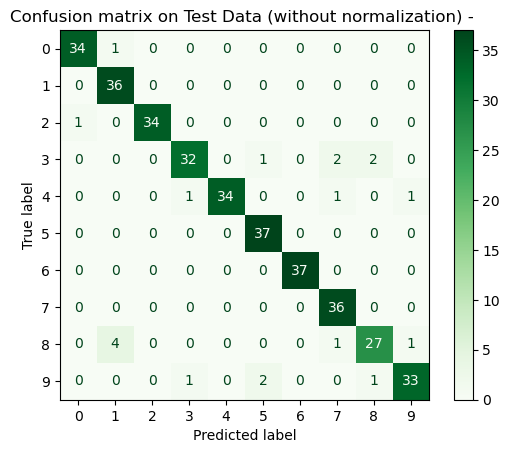

In [20]:
#y_pred = clf.predict(X_test)
score_Test = model_classifieur_KNN.score(X_umap_test,y_test)
score_Train = model_classifieur_KNN.score(X_umap_train, y_train)

disp = ConfusionMatrixDisplay.from_estimator(model_classifieur_KNN, X_umap_test, y_test, cmap=plt.cm.Greens)  
disp.ax_.set_title("Confusion matrix on Test Data (without normalization) - ")  # positionnement du titre

print('\nAccuracy on train data: {} KNN + UMAP \nAccuracy on test data: {} KNN + UMAP'.format(score_Train.round(3),score_Test.round(3)))
plt.show()

### REMARQUE
On obtient des résultats comparables mais avec uniqument 2 composantes au lieu de 13 !!

#### 4.1.2 Forêt aléatoire
Identifier un modèle forêt aléatoire avec 50 arbres à partir des données d'entrées-sortie d'apprentissage X_umap_train et y_train.

In [22]:
model_RF = RandomForestClassifier(n_estimators=50,random_state=42)
model_RF.fit(X_umap_train, y_train)




RandomForestClassifier(n_estimators=50, random_state=42)

#### 4.1.2.1 Analyse des performances du modèle classifieur Forêt aléatoire (en apprentissage et en validation)
Aanalyser en détail les résultats obtenus en apprentissage et en validation.
Utiliser les **matrices de confusion.**

**Commenter les résultats obtenus**.


Accuracy on train data: 1.0 FORET ALEATOIRE + UMAP 
Accuracy on test data: 0.933 FORET ALEATOIRE +UMAP


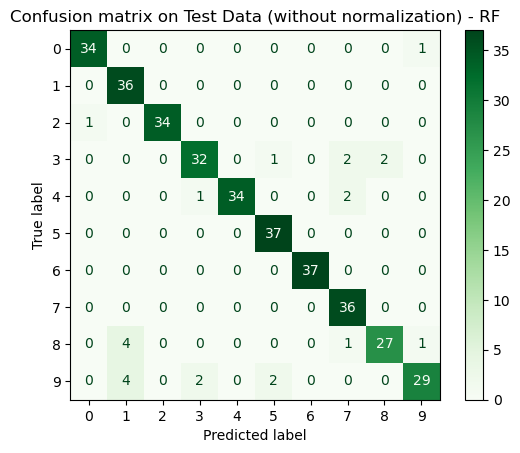

In [23]:
#y_pred = clf.predict(X_test)
score_Test = model_RF.score(X_umap_test,y_test)
score_Train = model_RF.score(X_umap_train, y_train)

disp = ConfusionMatrixDisplay.from_estimator(model_RF, X_umap_test, y_test, cmap=plt.cm.Greens)  
disp.ax_.set_title("Confusion matrix on Test Data (without normalization) - RF")  # positionnement du titre

print('\nAccuracy on train data: {} FORET ALEATOIRE + UMAP \nAccuracy on test data: {} FORET ALEATOIRE +UMAP'.format(score_Train.round(3),score_Test.round(3)))
plt.show()

### REMARQUE
Amélioration des résultats obtenus avec l'ACP avec uniqument 2 composantes au lieu de 13 !!

#### 4.1.2 Autres classifier

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers =SVC()
classifiers_ACP = SVC()

#classifiers =AdaBoostClassifier(random_state=42)

#classifiers=KNeighborsClassifier(3),
#    SVC(kernel="linear", C=0.025, random_state=42),
#    SVC(gamma=2, C=1, random_state=42),
#    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
#    DecisionTreeClassifier(max_depth=5, random_state=42),
#    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
#    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
#    AdaBoostClassifier(random_state=42),
#    GaussianNB(),
#    QuadraticDiscriminantAnalysis(),

In [ ]:
classifiers.fit(X_umap_train, y_train)
classifiers_ACP.fit(X_train_reduit, y_train)


#y_pred = clf.predict(X_test)
score_Test = classifiers.score(X_umap_test,y_test)
score_Train = classifiers.score(X_umap_train, y_train)

score_Test_ACP = classifiers_ACP.score(X_test_reduit,y_test)
score_Train_ACP = classifiers_ACP.score(X_train_reduit, y_train)

print('AVEC ACP')
print('Accuracy on train data: {}  \nAccuracy on test data: {} '.format(score_Train_ACP.round(3),score_Test_ACP.round(3)))
plt.show()

print('\nAVEC UMAP')
print('Accuracy on train data: {}  \nAccuracy on test data: {} '.format(score_Train.round(3),score_Test.round(3)))
plt.show()

### 4.5 Commenter les résultats obtenus
... \
...

### TEST SVM